In [1]:
import pymongo
import time
import pandas as pd
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["IMDB"]
members = mydb["members"]
movies=mydb["movies"]

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:

myquery1 = [{
            '$match': {
            'numvotes': {
                '$gt': 10000
            }
        }},
    {
        '$unwind': '$genres'
    }, {
        '$project': {
            'genres': 1,
            'avgrating': 1
        }
    }
]

# result.drop()

mydoc = movies.aggregate(myquery1)

In [12]:
df=pd.DataFrame(list(mydoc))

In [13]:
df.head()

,_id,avgrating,genres
0,12,7.5,Short
1,12,7.5,Documentary
2,417,8.2,Action
3,417,8.2,Comedy
4,417,8.2,Adventure


In [14]:
df.shape

(32215, 3)

In [15]:
#df.shape
from matplotlib import rcParams
rcParams['figure.figsize'] = 25,20

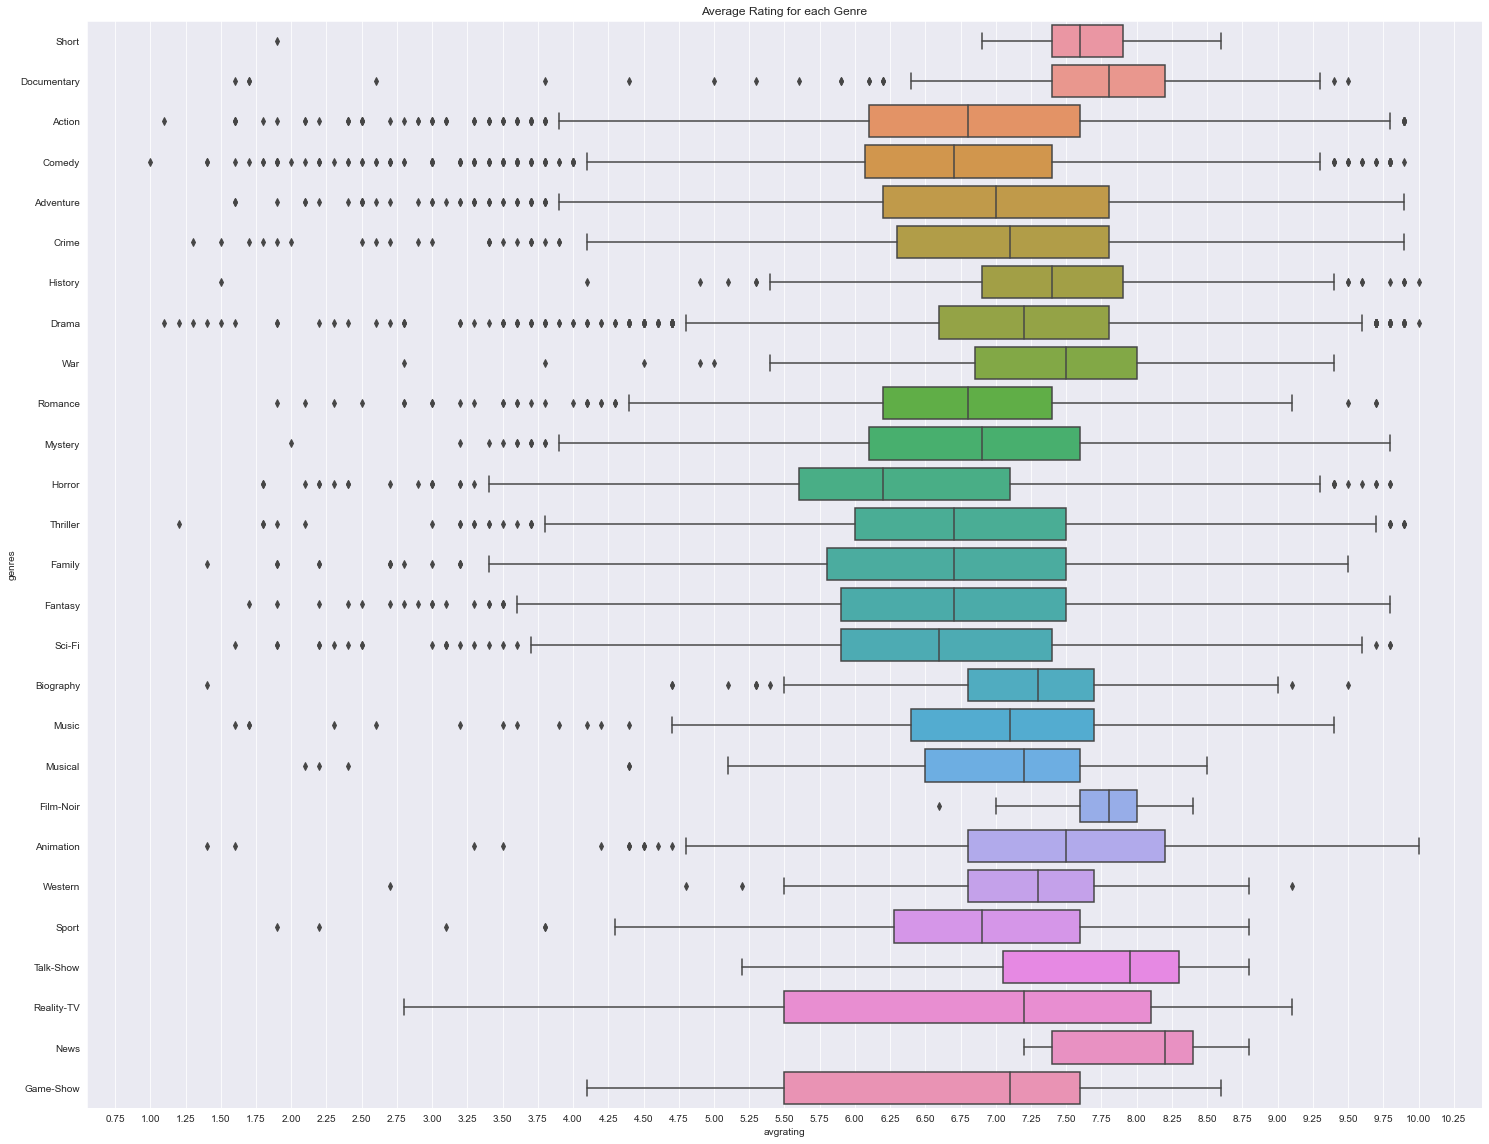

In [41]:
sns.set_style("darkgrid")
plt.xticks([0.25*i for i in range(0,45)])
sns.boxplot( y="genres", x="avgrating",data=df ).set(title='Average Rating for each Genre')
sns.axes_style("darkgrid")
plt.show()

In [16]:

myquery1 = [
    {
        '$unwind': '$actors'
    }, {
        '$unwind': '$genres'
    }, {
        '$group': {
            '_id': {
                'genre': '$genres', 
                'movie': '$_id'
            }, 
            'no_of_actors': {
                '$sum': 1
            }
        }
    },
{'$match' : {"no_of_actors" : {"$gte" : 1}}}
    , {
        '$group': {
            '_id': '$_id.genre', 
            'avg_no_actors': {
                '$avg': '$no_of_actors'
            }
        }
    }
]
# result.drop()

mydoc = movies.aggregate(myquery1,allowDiskUse=True)

In [17]:
df=pd.DataFrame(list(mydoc))

[Text(0.5, 1.0, 'Average No of Actors per movie for each Genre')]

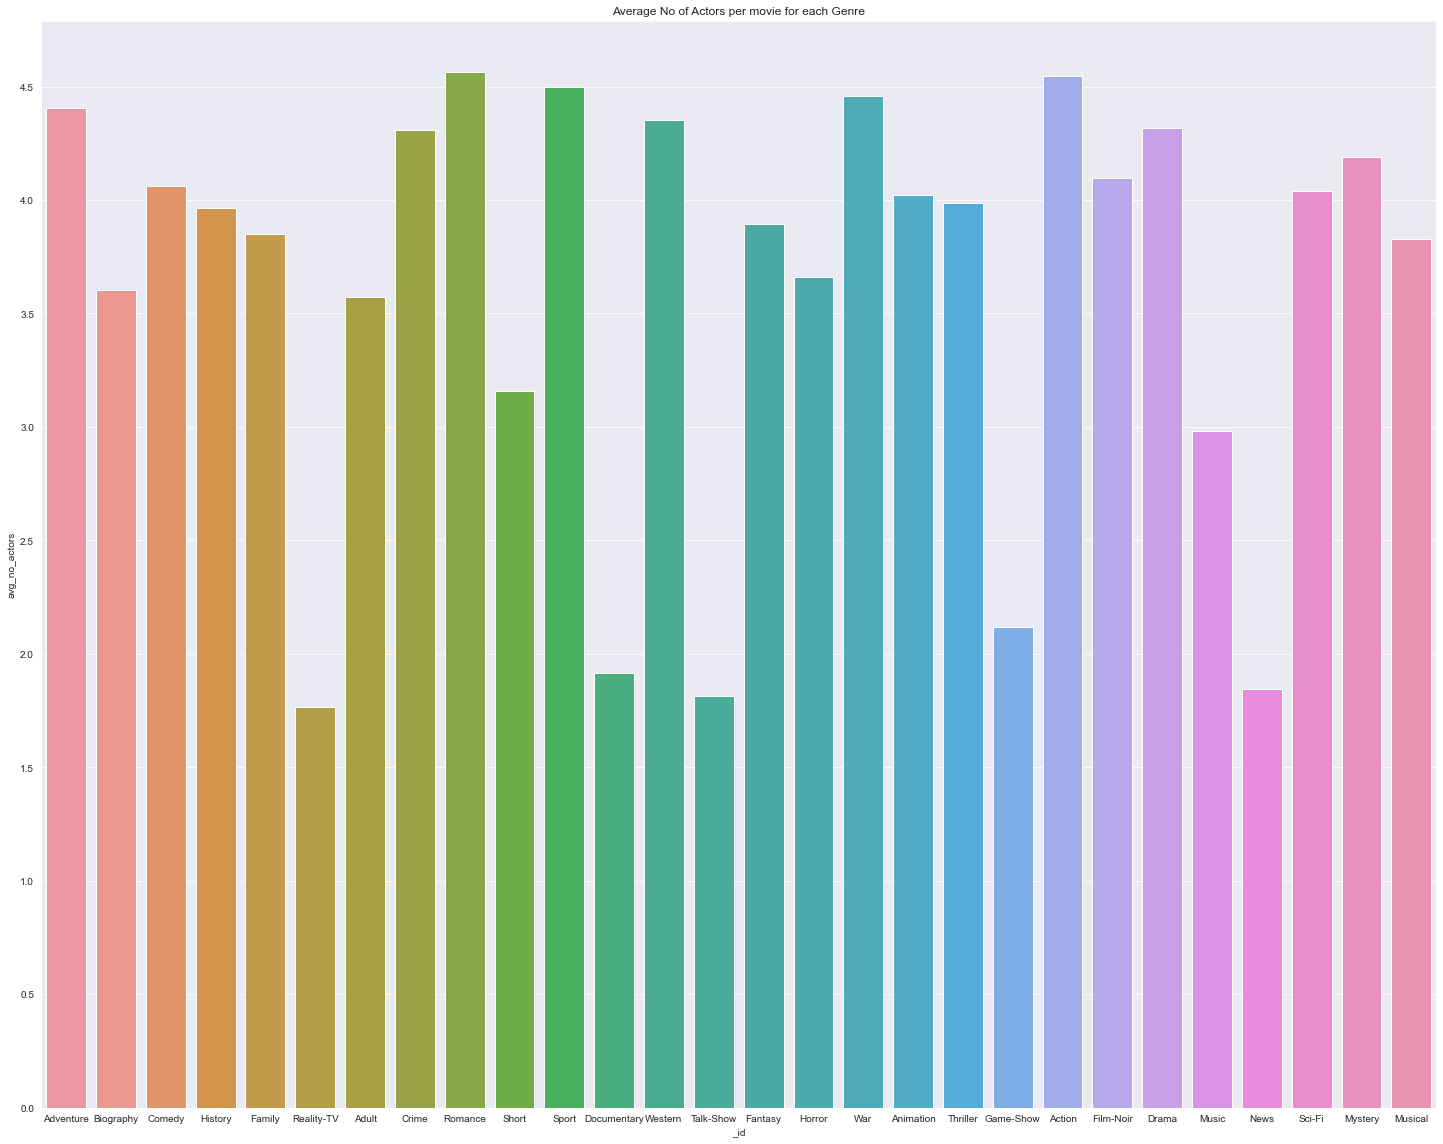

In [18]:
sns.set_style("darkgrid")
plt.yticks([0.5*i for i in range(0,11)])
sns.barplot(x = '_id',
            y = 'avg_no_actors',
            data = df).set(title='Average No of Actors per movie for each Genre')

In [4]:

myquery1 = {
   "$group" : {"_id" : "$startYear", "numtitles" : {"$sum" : 1}}
}

#result.drop()

mydoc = movies.aggregate([myquery1])

In [5]:
df=pd.DataFrame(list(mydoc))

In [6]:
df.dropna()

,_id,numtitles
0,1922.0,3614
1,1957.0,14594
2,1967.0,26899
3,1979.0,29834
4,1885.0,1
...,...,...
145,1888.0,5
146,1968.0,25881
147,2006.0,157258
148,1948.0,3707


[Text(0.5, 1.0, 'No of movies by Year')]

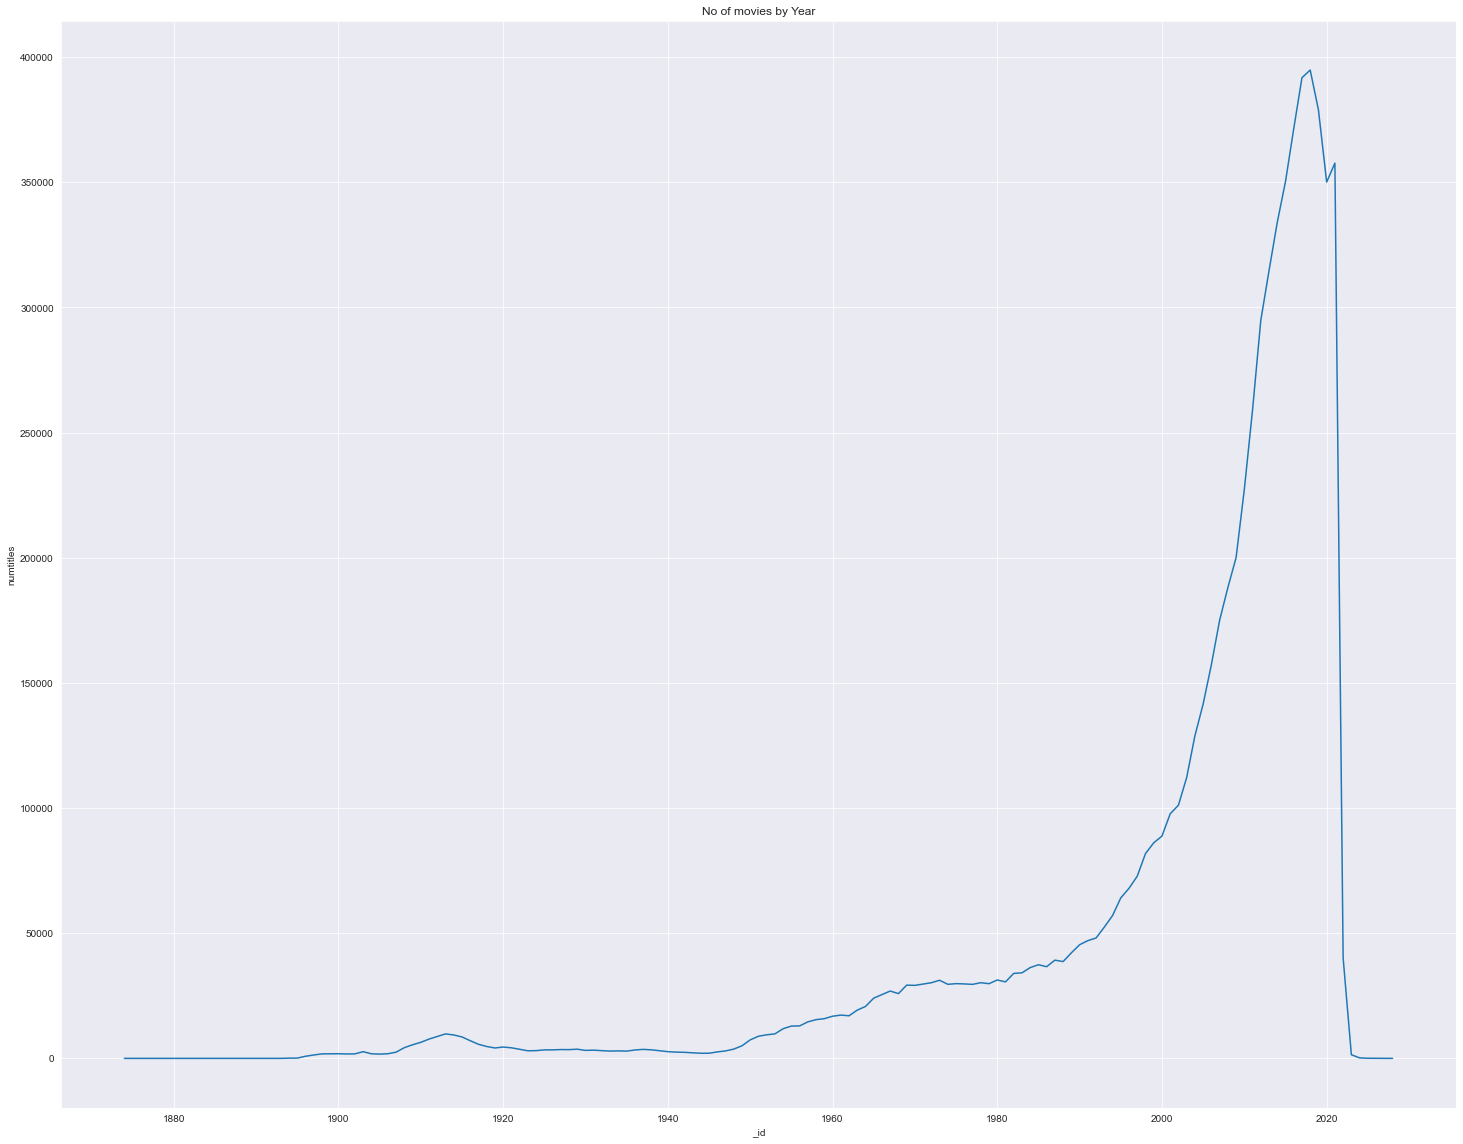

In [10]:
sns.set_style("darkgrid")
sns.lineplot(x = '_id', y = 'numtitles',data = df).set(title='No of movies by Year')